In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import math


In [2]:
dane = pd.read_csv("dane/insurance.csv")

In [3]:
dane

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
print(dane.columns[0])

age


In [5]:
def drawAllHist(data, histNumInRow, res):
    """
    Funkcja rysująca histogramy z podanych danych w postaci siatki wykresów
    :param data: dane w postaci np.array wczytane z sklearn
    :param histNumInRow: wartość całkowita określająca ilość histogramów w jednym rzędzie
    :param res: rozdzielczość histogramów
    """
    # ile mamy kolumn w danych
    cols = data.values.shape[1]
    # liczymy ile ma być rzędów
    howManyHistRows = math.ceil(cols/histNumInRow)
    # tworzymy kontener na wykresy
    fig, axs = plt.subplots(howManyHistRows, histNumInRow, figsize=(20, 40))
    # rysujemy, idziemy po rzędach i rysujemy w każdej kolumnie
    for r in range(histNumInRow):
        for c in range(howManyHistRows):
            # liczymy indeks kolumny w danych
            idx = int(c * histNumInRow + r)
            # sprawdzamy czy tyle w ogóle ich mamy
            if idx < cols:
                axs[c, r].set_title(data.columns[idx])
                axs[c, r].hist(data[data.columns[idx]], bins=res)
            else:
                break
    plt.show()

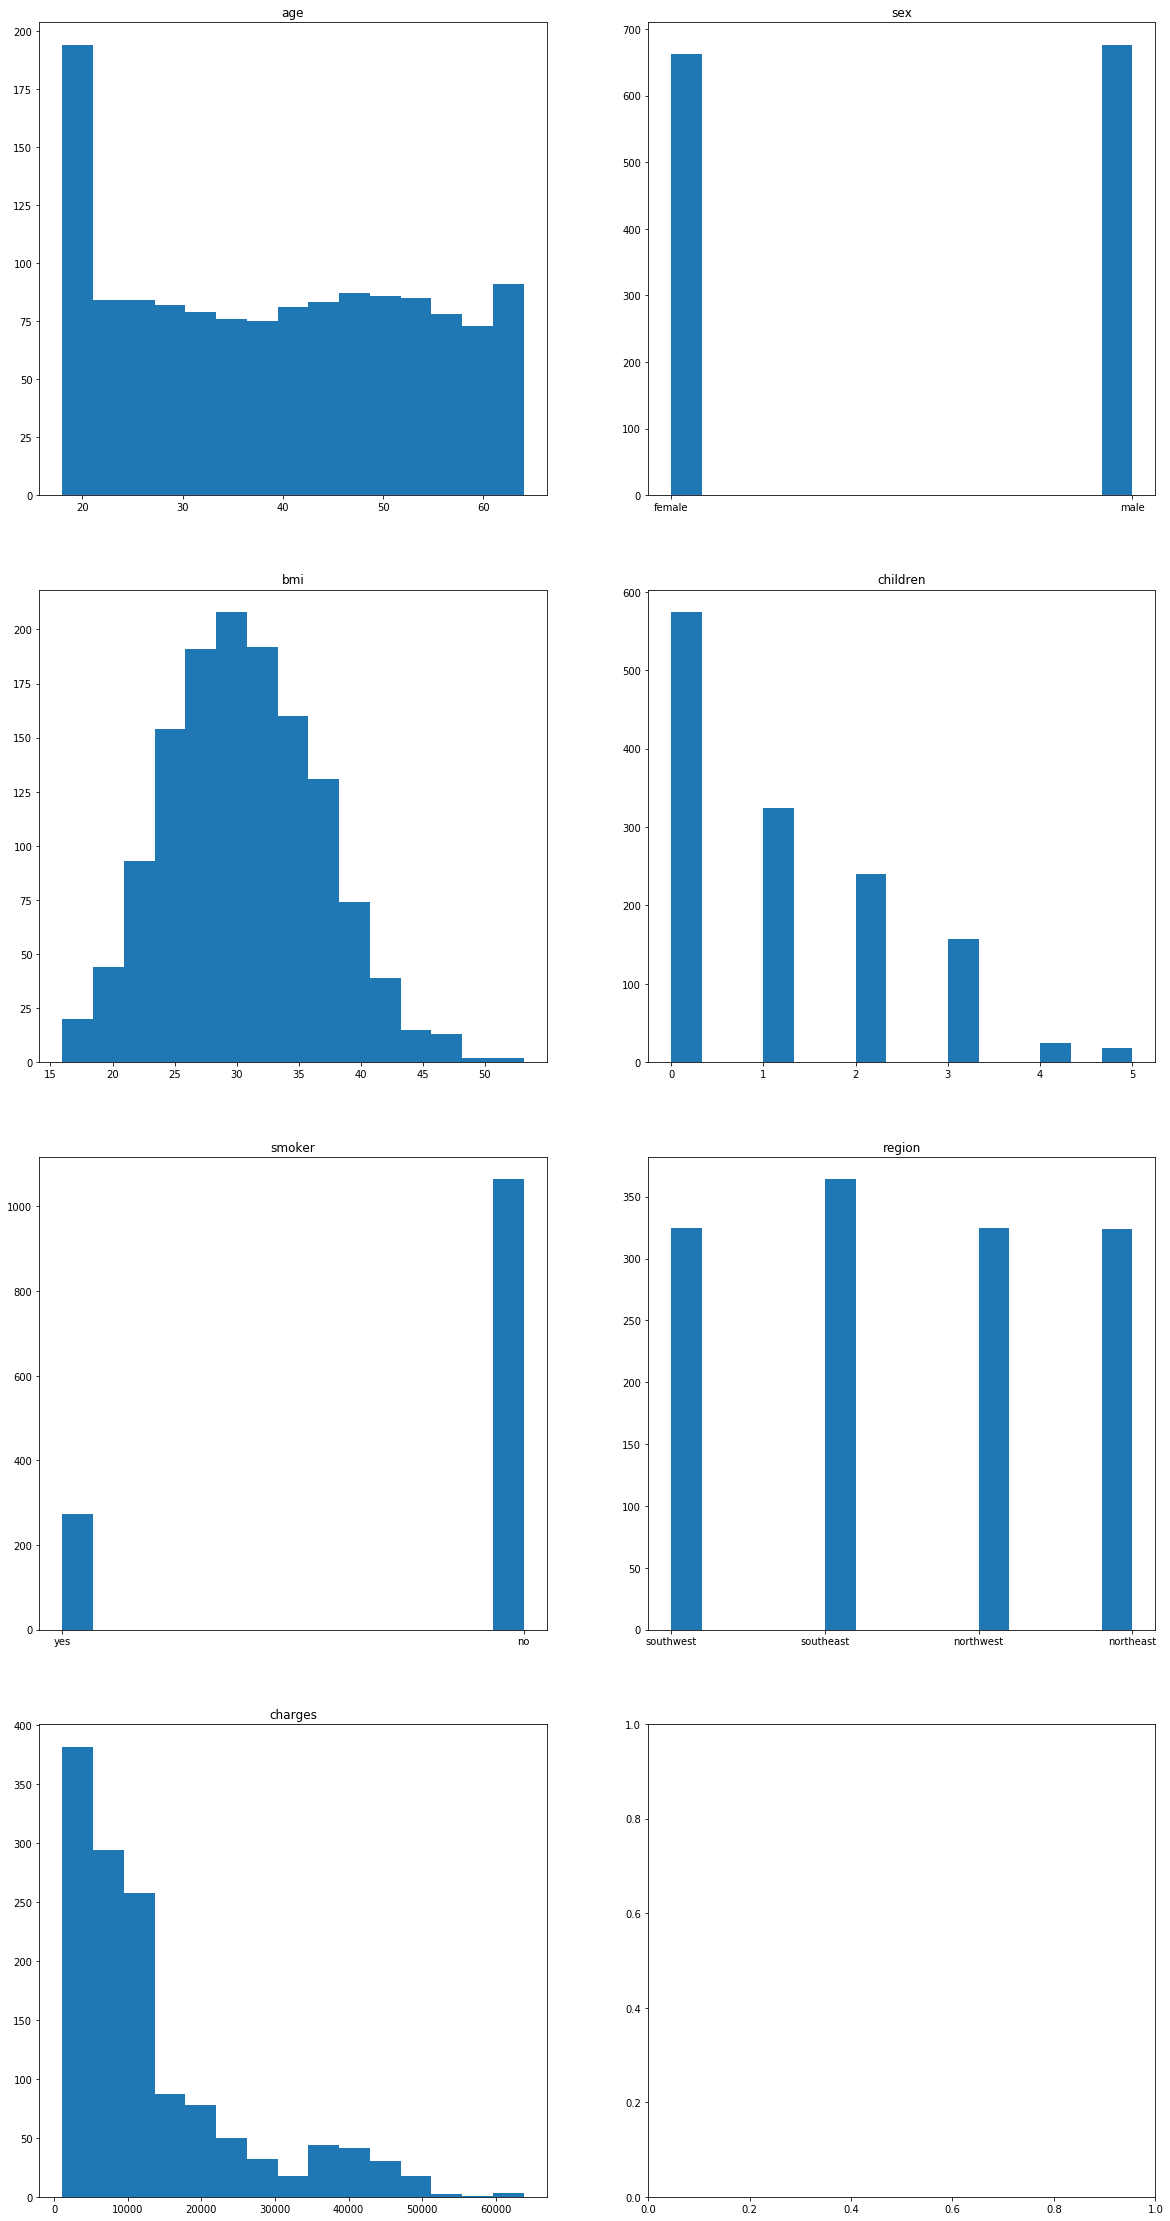

In [6]:
drawAllHist(dane, 2, 15)

In [7]:
dane.info() # są kolumny które trzeba enkodować

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dane.isna().all().all #nie ma pustych danych

<bound method Series.all of age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool>

### Enkodowanie

In [9]:
dane['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [11]:
ohenc = OneHotEncoder()
labenc = LabelEncoder()

dane_enc = dane.drop(columns = ['region', 'sex', 'smoker' ])
region_enc = pd.DataFrame(ohenc.fit_transform(dane[['region']]).toarray(), columns = ['northeast','northwest','southeast','southwest'])
sex_enc = pd.DataFrame(labenc.fit_transform(dane[['sex']]), columns = ['is_male'])
smoker_enc = pd.DataFrame(labenc.fit_transform(dane[['smoker']]), columns = ['is_smoker'])

dane_enc = dane_enc.join(region_enc, how='outer')
dane_enc = dane_enc.join(sex_enc, how='outer')
dane_enc = dane_enc.join(smoker_enc, how='outer')
dane_enc

C:\Users\pmoni\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,age,bmi,children,charges,northeast,northwest,southeast,southwest,is_male,is_smoker
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0,1
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1,0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1,0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1,0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,1,0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,0,0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,0,0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,0,0


### Dodanie nowych zmiennych

In [12]:
# a = pd.DataFrame(dane_enc['age'] * dane_enc['age'])
# a
# nowa_kolumna8 = pd.DataFrame(dane_enc['age'] * dane_enc['age']) 
# nowa_kolumna8
# nowa_kolumna15 = pd.DataFrame(np.log(dane_enc['age']))
# nowa_kolumna15
# d = pd.DataFrame(dane_enc['bmi'] * dane_enc['bmi'], columns = ['AgeAge'])
# d

In [13]:
# do regresji (przy drzewach trzeba sprawdzić czy warto tworzyć nowe zmienne)
# nowa_kolumna1 = pd.DataFrame(dane_enc['age'] * dane_enc['bmi'], columns = ['AgeBmi']) 
# nowa_kolumna2 = pd.DataFrame(dane_enc['children'] * dane_enc['bmi'], columns = ['ChildrenBmi'])
# nowa_kolumna3 = pd.DataFrame(dane_enc['age'] * dane_enc['children'] * dane_enc['bmi'], columns = ['AgeChildrenBmi'])
# nowa_kolumna4 = pd.DataFrame(dane_enc['age'] * dane_enc['children'], columns = ['AgeChildren'])
# nowa_kolumna5 = pd.DataFrame(dane_enc['age'] * dane_enc['is_male'], columns = ['AgeIsMale'])
# nowa_kolumna6 = pd.DataFrame(dane_enc['bmi'] * dane_enc['is_male'], columns = ['BmiIsMale'])
# nowa_kolumna7 = pd.DataFrame(dane_enc['children'] * dane_enc['is_male'], columns = ['ChildrenIsMale'])

# Sqrt
# nowa_kolumna8 = pd.DataFrame(dane_enc['age'] * dane_enc['age'], columns = ['AgeSqrt']) 
# nowa_kolumna9 = pd.DataFrame(dane_enc['bmi'] * dane_enc['bmi'], columns = ['BmiSqrt'])
# nowa_kolumna10 = pd.DataFrame(dane_enc['children'] * dane_enc['children'], columns = ['childrenSqrt'])

#Log
# nowa_kolumna15 = pd.DataFrame(np.log(dane_enc['age']), columns = ['AgeLog']) 
# nowa_kolumna16 = pd.DataFrame(np.log(dane_enc['bmi']), columns = ['BmiLog'])

# dane_enc = dane_enc.join(nowa_kolumna1, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna2, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna3, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna4, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna5, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna6, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna7, how='outer')

# dane_enc = dane_enc.join(nowa_kolumna8, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna9, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna10, how='outer')

# dane_enc = dane_enc.join(nowa_kolumna15, how='outer')
# dane_enc = dane_enc.join(nowa_kolumna16, how='outer') 

dane_enc

,age,bmi,children,charges,northeast,northwest,southeast,southwest,is_male,is_smoker
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,0,1
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1,0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1,0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1,0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,1,0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,0,0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,0,0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,0,0


In [14]:
dane_enc.isna().all()

age          False
bmi          False
children     False
charges      False
northeast    False
northwest    False
southeast    False
southwest    False
is_male      False
is_smoker    False
dtype: bool

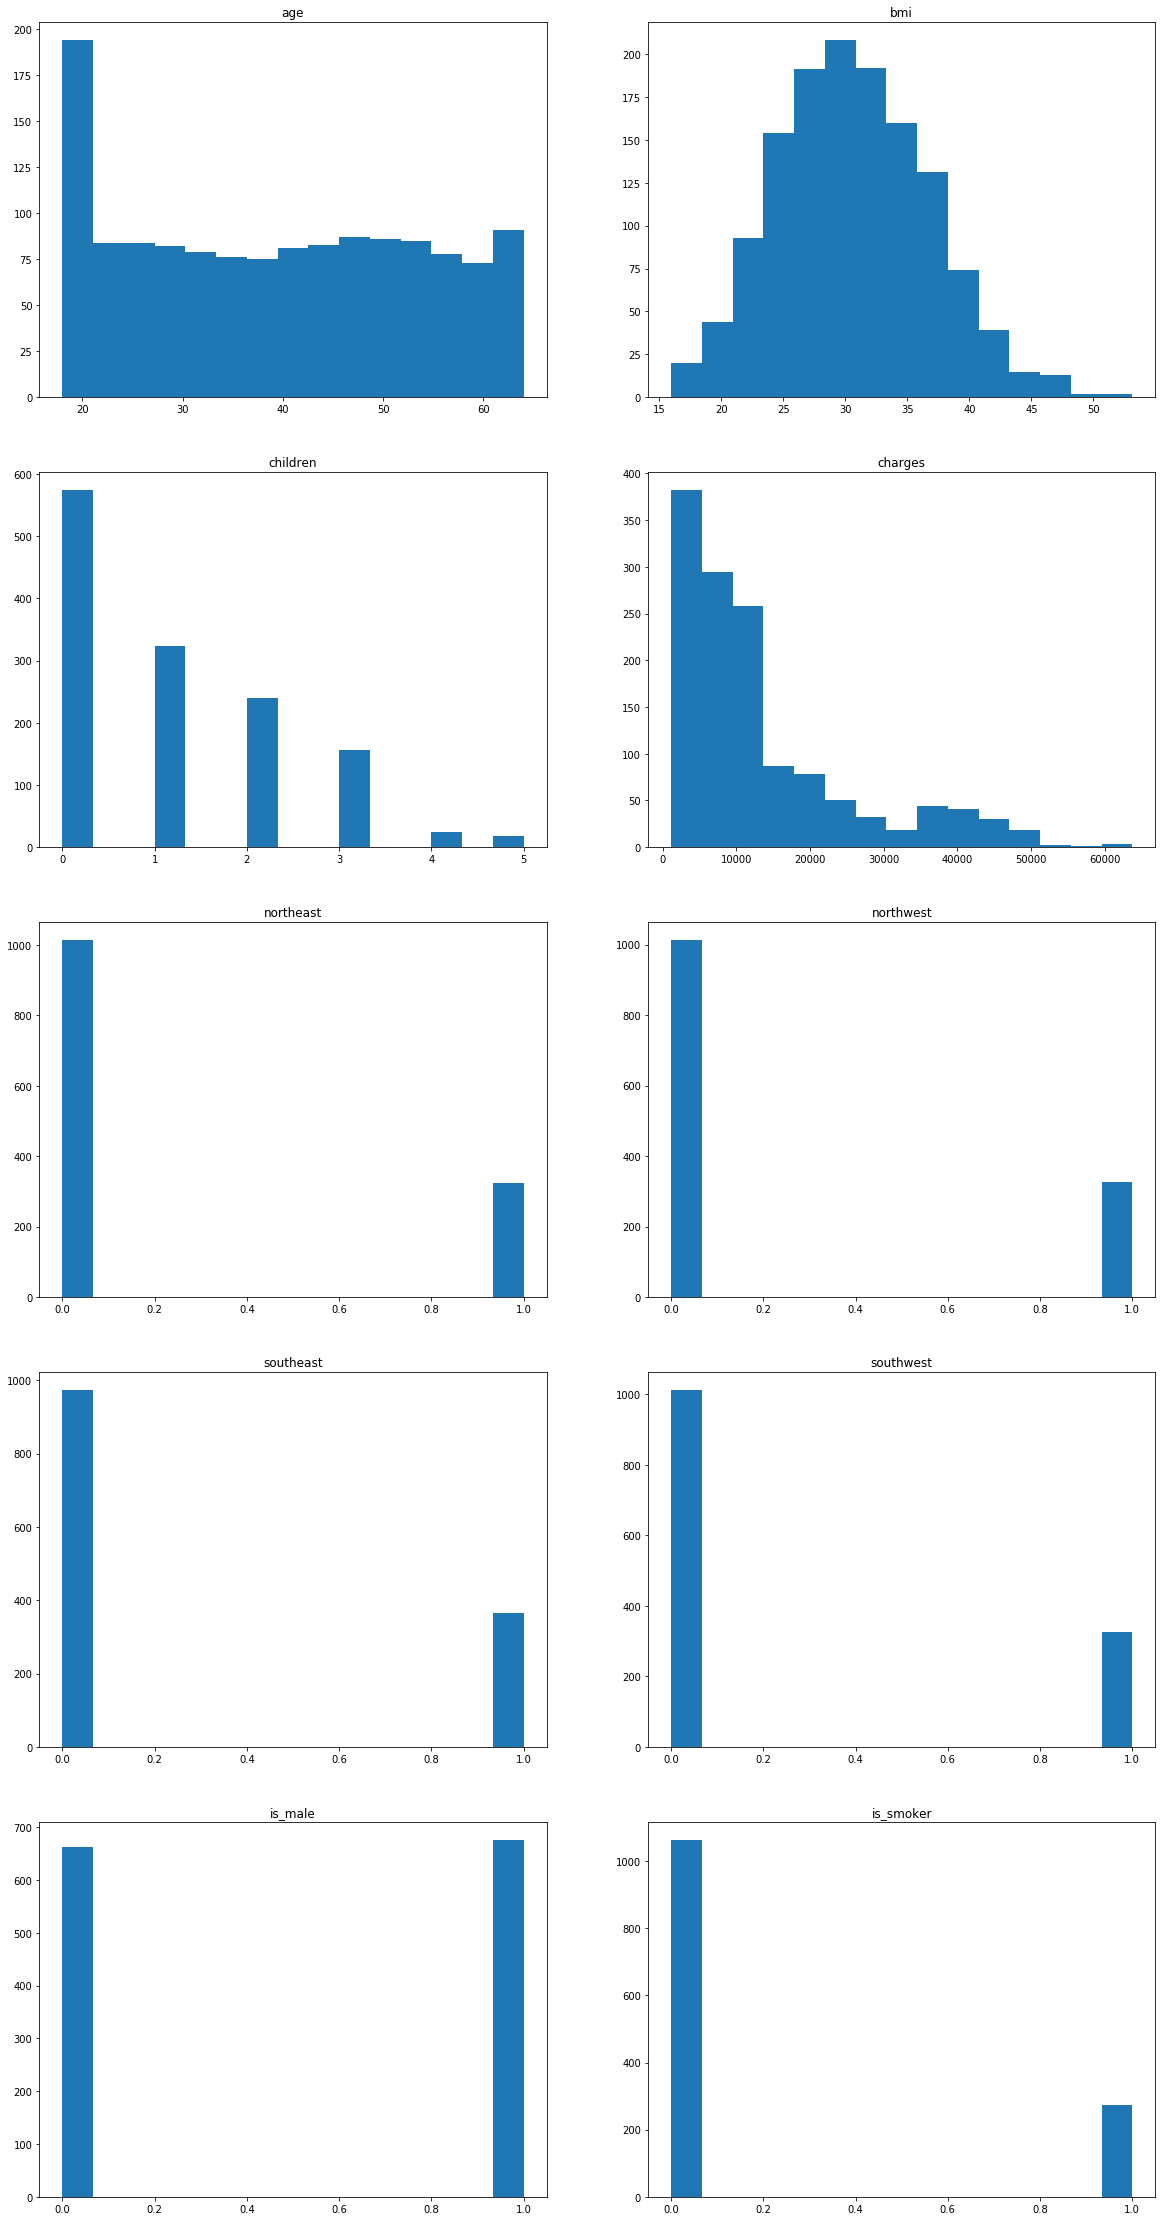

In [15]:
drawAllHist(dane_enc, 2, 15)

#### Usunięcie outlajerów

In [16]:
def outlier_iqr(df, colums):
    lower_limit = {}
    upper_limit = {}

    for col in colums:
        q1 = np.quantile(df[col], q=.25)
        q3 = np.quantile(df[col], q=.75)

        iqr = q3 - q1

        lower_limit[col] = q1 - 1.5 * iqr
        upper_limit[col] = q3 + 1.5 * iqr
        
    for col in colums:
        df = df.loc[(df[col] >= lower_limit[col]) & (df[col] <= upper_limit[col])]
    
    return df

In [17]:
dane_enc.columns

Index(['age', 'bmi', 'children', 'charges', 'northeast', 'northwest',
       'southeast', 'southwest', 'is_male', 'is_smoker'],
      dtype='object')

In [18]:
dane_enc = outlier_iqr(dane_enc, ['age', 'bmi', 'charges'])
#                                   , 'AgeBmi',
#        'ChildrenBmi', 'AgeChildrenBmi', 'AgeChildren', 'AgeIsMale',
#        'BmiIsMale'])
print(dane_enc.shape)
print(dane_enc.isna().all())

(1193, 10)
age          False
bmi          False
children     False
charges      False
northeast    False
northwest    False
southeast    False
southwest    False
is_male      False
is_smoker    False
dtype: bool


# Wybór danych tylko dla niepalących

In [19]:
dane_enc = dane_enc[(dane_enc['is_smoker'] == 0)]

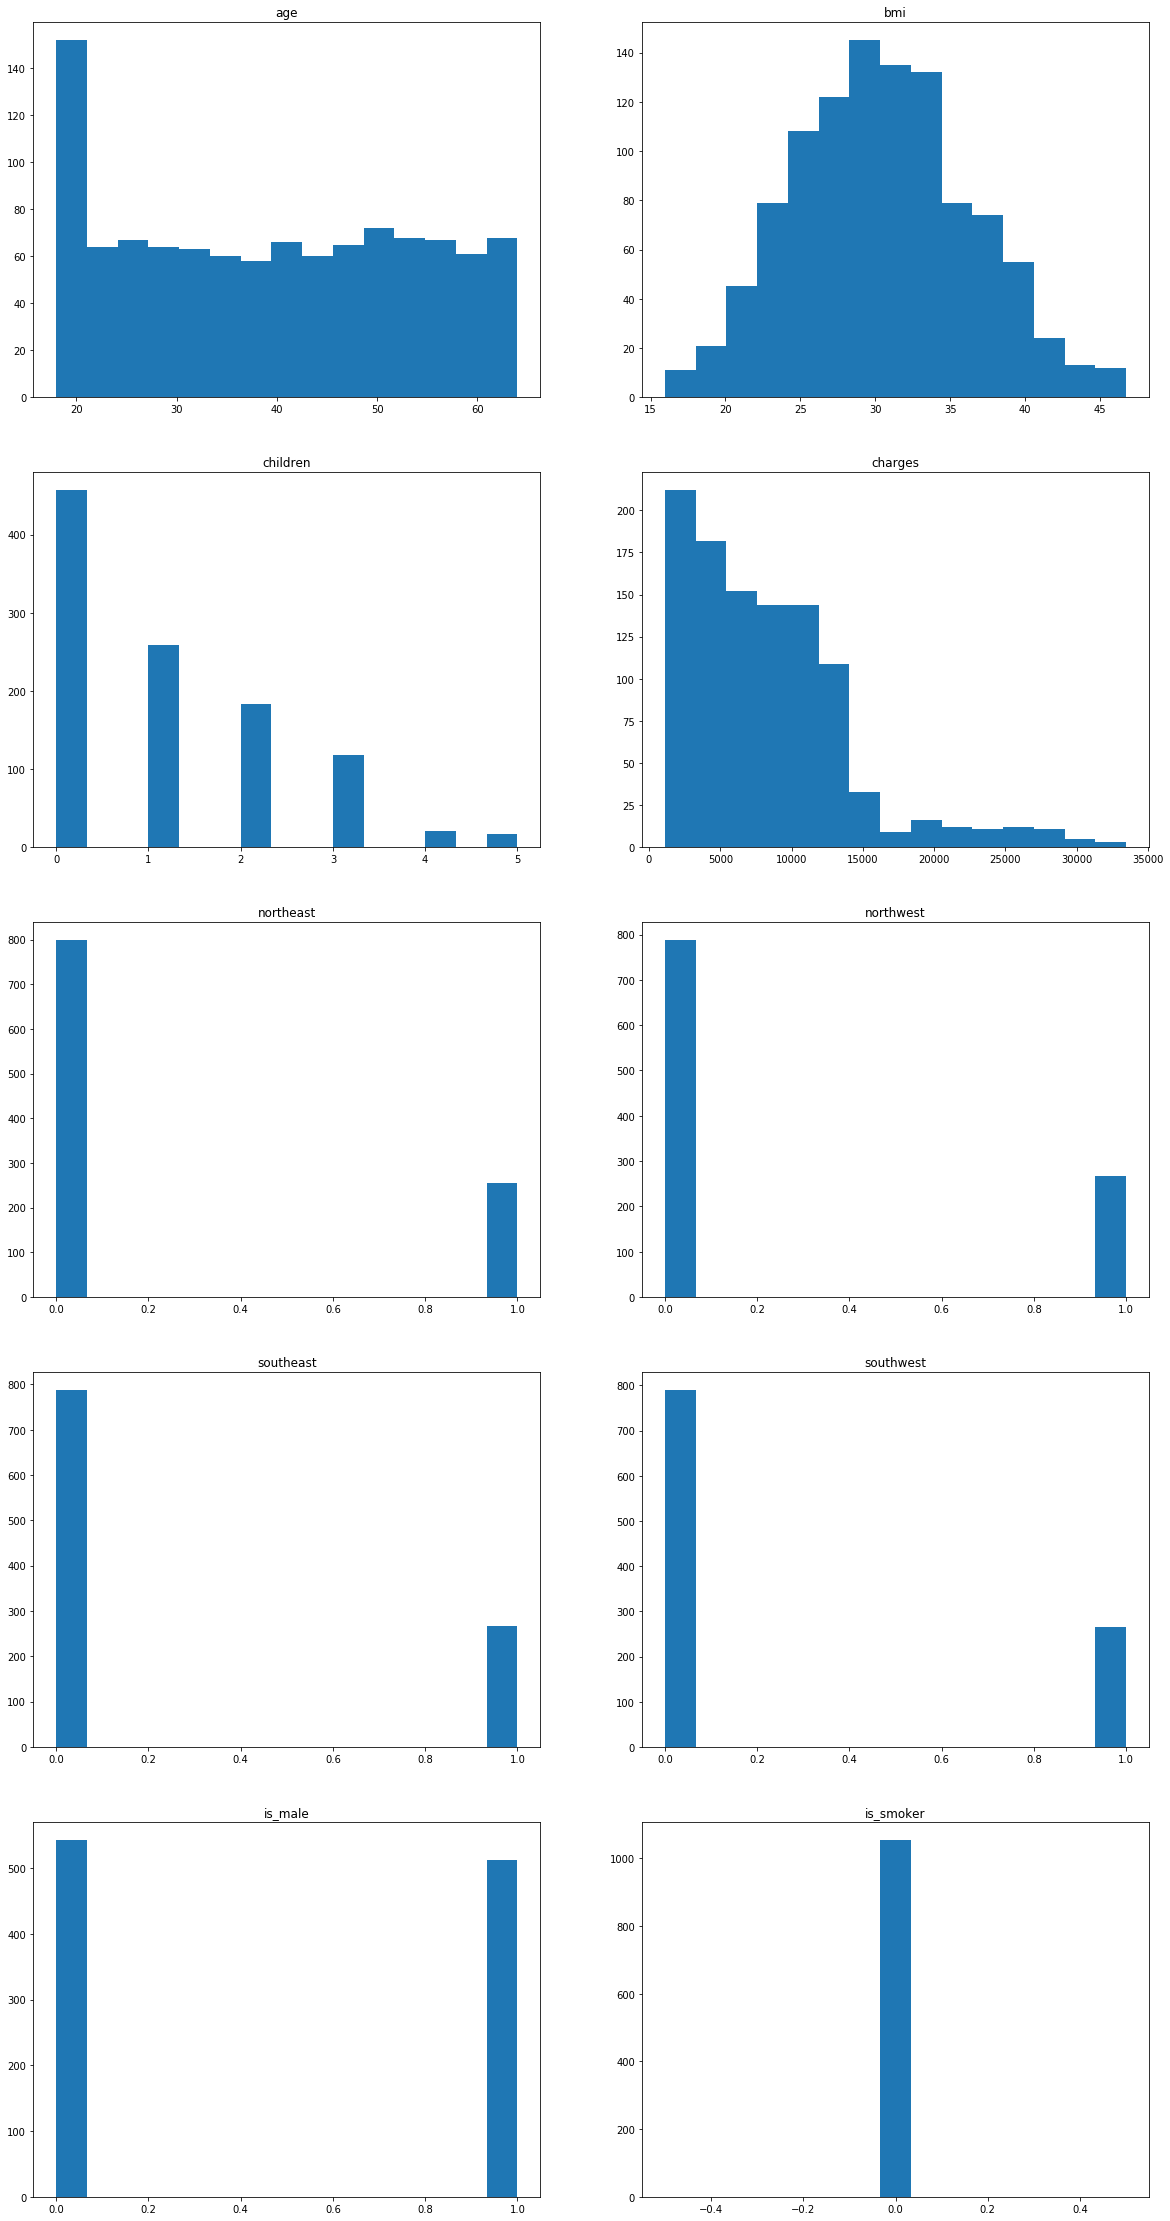

In [20]:
drawAllHist(dane_enc, 2, 15)

### Podział na zbiór treningowy / testowy i walidacyjny & Standaryzacja i Normalizacja

In [21]:
from sklearn.model_selection import train_test_split

X = dane_enc.drop(columns = ['charges'])
y = dane_enc['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size= .2)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_train, y_train, random_state = 12, test_size= .2) 

### Standaryzacja i Normalizacja (dannych treningowych, walidacyjnych i testowych)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

STDscaler = StandardScaler()
NRMscaler = MinMaxScaler()

# zmienne treningowe
X_train_v_std = STDscaler.fit_transform(X_train_v)
X_train_v_std_nrm = NRMscaler.fit_transform(X_train_v_std)

# zmienne walidacyjne
X_test_v_std = STDscaler.fit_transform(X_test_v)
X_test_v_std_nrm = NRMscaler.fit_transform(X_test_v_std)
X_test_std = STDscaler.fit_transform(X_test)
X_test_std_nrm = NRMscaler.fit_transform(X_test)


In [23]:
regrProjectDataSplit = (X_train_v_std_nrm, X_test_std_nrm, X_test_v_std_nrm, y_train_v, y_test, y_test_v)

In [24]:
print(X_train_v_std_nrm.shape, X_test_std_nrm.shape, X_test_v_std_nrm.shape, y_train_v.shape, y_test.shape, y_test_v.shape)

(675, 9) (211, 9) (169, 9) (675,) (211,) (169,)


### Budowa modelu

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [26]:
regrModelsProject = {
    "linear": LinearRegression(),
    "decision_tree": DecisionTreeRegressor(),
    "random_forest": RandomForestRegressor(),
    "xgboost": XGBRegressor(objective="reg:squarederror"),
    "svm": SVR(),
    "knn": KNeighborsRegressor()
}

---
### 6. Trening

- wykonujemy trening przy pomocy kross-waldiacji
- uniwersalna funkcja do treningu jakiegokolwiek modelu
- jako rezultat treningu cv pobieramy średnie wartości 'fit_time', score_time, test_score
- uniwrsalna funkcja do wykreślania wyników treningu kilku modeli na jednym wykresie. Porównanie średnich wartości z treningu.
- przeprowadzamy trening i rysujemy wyniki

In [27]:
# import numpy as np
# import sklearn
# import matplotlib.pyplot as plt
# import math
# import xgboost

from sklearn.model_selection import cross_validate

# from sklearn.model_selection import train_test_split
# from sklearn import datasets

In [28]:
# funkcja trenująca model
def trainCV(model, data, target, cv=5):
    """
    funkcja przeprowadzająca krosswalidację oraz zwracająca średnie wartości czasów i score'a
    :param model: model estymatora z pakietu sklearn
    :param data: cechy do przeprowadzenia uczenia
    :param target: wartości wyjściowe
    :param cv: ilość podziałów na krosswalidację, domyślnie 5
    """
    # przeprowadzamy kross walidację i zbieramy wyniki
    results = cross_validate(model, data, target, cv=cv)
    # zwracamy średnie ze wszystkich przebiegów
    outputDict = {
        'meanFitTime': results['fit_time'].mean(),
        'meanScoreTime': results['score_time'].mean(),
        'meanScore':  results['test_score'].mean()
    }
    return outputDict

#### uczymy i wykreślamy wyniki treningu

In [43]:
def printResultsCharts(results, figsize=(15, 20)):
    """
    Wyświetlanie wykresów wyników treningu
    :param results: wyniki treningu w postaci słownika list, np. {
        "modelName": [], <- ta lista musi być zawsze, reszta jest opcjonalna
        "meanScore": [], 
        "meanFitTime": [],
        "meanScoreTime": []}
    """
    # pobieramy listę nazw zawartości
    keys = list(results.keys())
    
    # tworzymy kontener na wykresy
    axis_number = len(keys)-1
    fig, axs = plt.subplots(axis_number, 1, figsize=figsize)
    
    if axis_number > 1:
        for i in range(axis_number):
            axs[i].bar(results[keys[0]],results[keys[i+1]])
            axs[i].set_ylabel(keys[i+1])
            axs[i].set_title(keys[i+1])
            axs[i].set_xlabel(keys[0])

    else:
        axs.bar(results[keys[0]],results[keys[1]])
        axs.set_ylabel(keys[1])
        axs.set_title(keys[1])


In [30]:
def TrainAndPrintResults(modelList, dataset, figsize=(15, 20)):
    """
    funkcja przeprowadzająca trening na liście modeli.
    :param modelList: Lista modeli kompatybilnych z pakietem sklearn
    :param dataset: krotka datasetu po podziale na train i test w postaci (x_train, x_test, y_train, y_test)
    """
    # bierzemy z datasetu dane treningowe
    x_train, x_test, x_validate, y_train, y_test, y_validate = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "meanScore": [],
        "meanFitTime": [],
        "meanScoreTime": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        tmpOneRes = trainCV(modelList[oneM], x_train, y_train)
        print("{0} mean train score = {1}".format(oneM,(tmpOneRes['meanScore'])))
        results["modelName"].append(oneM)
        results["meanScore"].append(tmpOneRes['meanScore'])
        results["meanFitTime"].append(tmpOneRes['meanFitTime'])
        results["meanScoreTime"].append(tmpOneRes['meanScoreTime'])
        #finally fit on whole train data
        modelList[oneM].fit(x_train, y_train)
    
    # present results on charts
    printResultsCharts(results, figsize=figsize)

linear mean train score = 0.3636573327464909
decision_tree mean train score = -0.34879181869561593
random_forest mean train score = 0.29578429169664605
xgboost mean train score = 0.12816890255802332
svm mean train score = -0.0362010881381384
knn mean train score = 0.2669184060244206


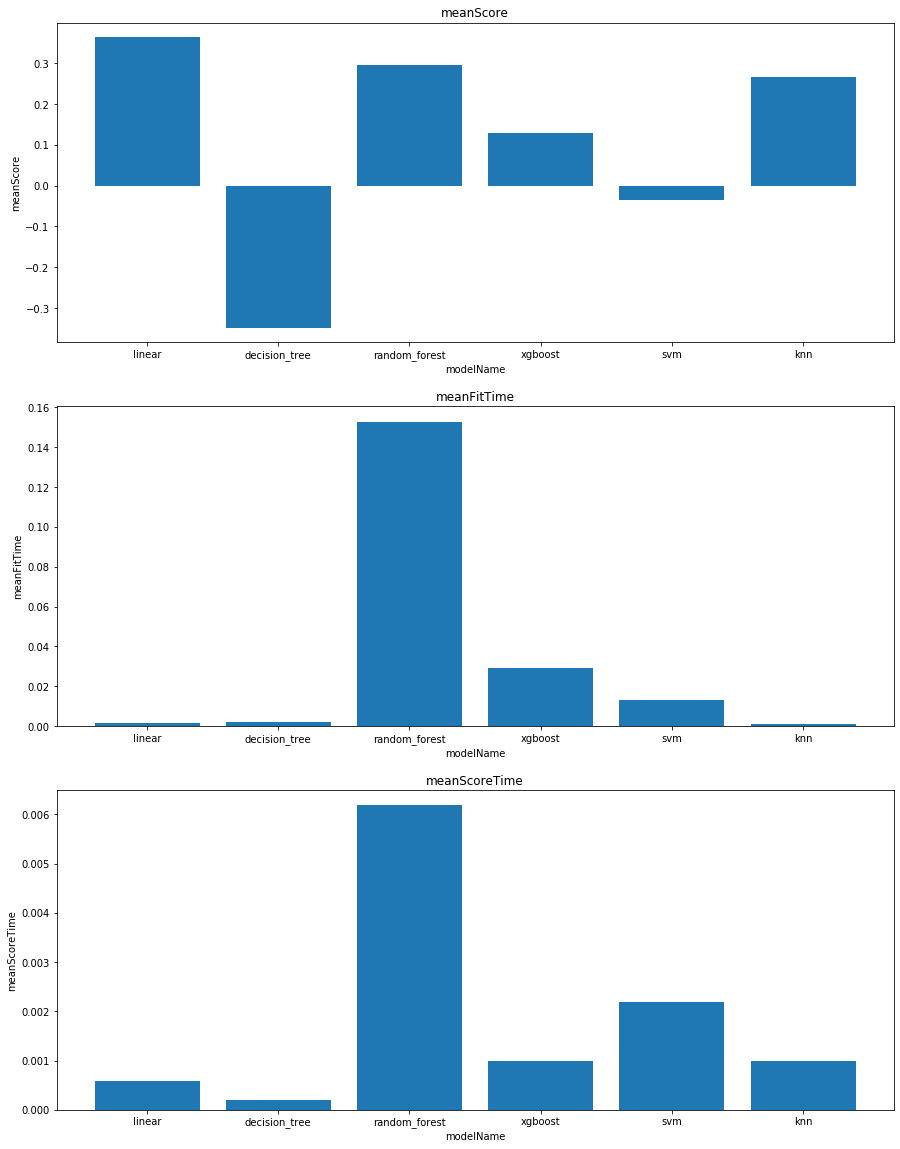

In [44]:
regrProjectResults = TrainAndPrintResults(regrModelsProject, regrProjectDataSplit)

---
## 7. Test
- analogicznie do treningu tworzymy uniwersalna funkcję dla jakiegokolwiek modelu
- dostaje listę modeli i dane do testu
- kolejna funkcja do rysowania wyników testu kilku modeli naraz, do porównania
- wnioski

In [32]:
def ValidateAndPrintResults(modelList, dataset, figsize=(15, 5)):
    """
    funkcja przeprowadzająca trening na liście modeli.
    :param modelList: Lista modeli kompatybilnych z pakietem sklearn
    :param dataset: krotka datasetu po podziale na train i test w postaci (x_train, x_test, y_train, y_test)
    """
    # bierzemy z datasetu dane treningowe
    x_train, x_test, x_validate, y_train, y_test, y_validate = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "testScore": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        testScore = modelList[oneM].score(x_validate, y_validate)
        print("{0} score = {1}".format(oneM,testScore))
        results["modelName"].append(oneM)
        results["testScore"].append(testScore)
        
    printResultsCharts(results, figsize=figsize)

linear score = 0.47573535300971925
decision_tree score = -0.9157350520027083
random_forest score = 0.3444163695581598
xgboost score = 0.23291957944205388
svm score = 0.0025232198741311773
knn score = 0.3609500025432506


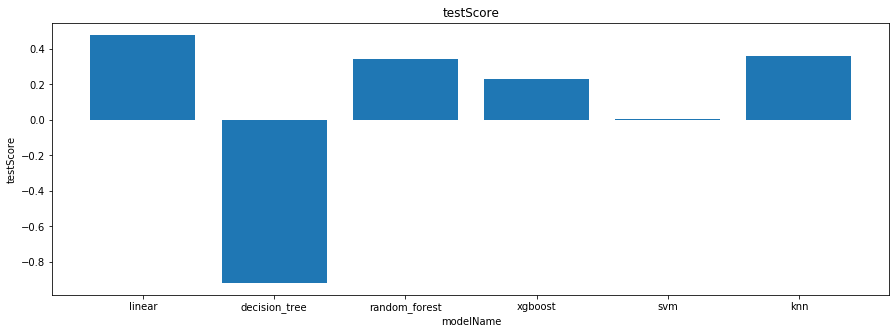

In [33]:
ValidateAndPrintResults(regrModelsProject, regrProjectDataSplit)

In [34]:
def TestAndPrintResults(modelList, dataset, figsize=(15, 5)):
    """
    funkcja przeprowadzająca trening na liście modeli.
    :param modelList: Lista modeli kompatybilnych z pakietem sklearn
    :param dataset: krotka datasetu po podziale na train i test w postaci (x_train, x_test, y_train, y_test)
    """
    # bierzemy z datasetu dane treningowe
    x_train, x_test, x_validate, y_train, y_test, y_validate = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "testScore": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        testScore = modelList[oneM].score(x_test, y_test)
        print("{0} score = {1}".format(oneM,testScore))
        results["modelName"].append(oneM)
        results["testScore"].append(testScore)
        
    printResultsCharts(results, figsize=figsize)

linear score = 0.4596210456075813
decision_tree score = -0.3857414630691518
random_forest score = 0.33780814743973375
xgboost score = 0.21013956597756767
svm score = 0.0024157831106348393
knn score = 0.31361694309312926


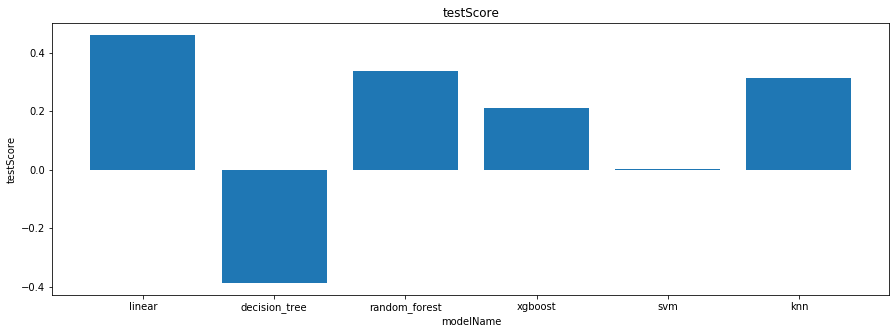

In [35]:
TestAndPrintResults(regrModelsProject, regrProjectDataSplit)

In [36]:
pd.Series(DTC.feature_importances_, index=[X.columns]).sort_values(ascending=False).where(lambda x: x >0).dropna()

NameError: name 'DTC' is not defined